In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# read training data
bank_train = pd.read_csv("/data/training/bank_train.csv")

# read test data
bank_test = pd.read_csv("/data/test/bank_test.csv")

print(bank_train.head())
print(bank_test.head())

##########################
## WRITE YOUR CODE HERE ##
##########################

# create x_train and y_train
x_train = bank_train.drop(['purchased', 'id'], axis=1)
y_train = bank_train[['purchased']]

#####################################################
## Implement GridSearchCV to find optimal max_depth
#####################################################

# specify number of folds for k-fold CV
n_folds =5 

# specify range of the hyperparameter max_depth 
parameters = {'max_depth':range(2,20,5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                   return_train_score = True)

# fit the rf model 
rf.fit(x_train, y_train)

# store scores/results of GridSearch CV in a df
scores = rf.cv_results_
print(pd.DataFrame(scores).head())

#####################################################
## Plot mean_train_score and mean_test_score (accuracies) on the x-axis
# and param_max_depth on the y-axis
#####################################################

plt.figure()
plt.plot(x=scores["mean_train_score"] , y=scores["param_max_depth"] , label="training accuracy")
plt.plot(x=scores["mean_test_score"] ,  y=scores["param_max_depth"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('/code/output/max_depth.png') 


# from the plot, observe the optimal value of max_depth
# and store in max_depth_optimal
max_depth_optimal =7 

#########################################
# Build the model with optimal max_depth
#########################################
rf = RandomForestClassifier(max_depth = max_depth_optimal)
rf.fit(x_train, y_train)

## Make predictions
predictions = rf.predict(bank_test.drop(['id'], axis=1))
print(predictions[:5])

# Write columns id, predictions into the output file
d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})

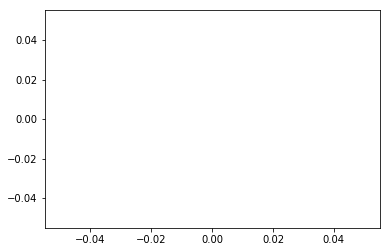

<Figure size 432x288 with 0 Axes>

In [7]:
#####################################################
## Plot mean_train_score and mean_test_score (accuracies) on the x-axis
# and param_max_depth on the y-axis
#####################################################

plt.figure()
plt.plot(x=[10.0,50,60,100] ,y=[2,7,12,17])
#plt.plot(x=scores["mean_test_score"] ,y=scores["param_max_depth"], label="test accuracy")
#plt.xlabel("max_depth")
#plt.ylabel("Accuracy")
#plt.legend()
plt.show()
plt.savefig('max_depth.png') 


# from the plot, observe the optimal value of max_depth
# and store in max_depth_optimal
# max_depth_optimal = 

#########################################
# Build the model with optimal max_depth
#########################################
# rf = RandomForestClassifier(max_depth = max_depth_optimal)
# rf.fit(x_train, y_train)

## Make predictions
# predictions = rf.predict(bank_test.drop(['id'], axis=1))
# print(predictions[:5])

# Write columns id, predictions into the output file
# d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})

# Write the output
#d.to_csv('/code/output/bank_predictions.csv', sep=",")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier

# read training data
bank_train = pd.read_csv("bank_train.csv")

# read test data
bank_test = pd.read_csv("bank_test.csv")

print(bank_train.head())
print(bank_test.head())

############################
### WRITE YOUR CODE HERE ###
############################

# Build the model 
# Create a random forest object rf (use default hyperparameters)
rf = RandomForestClassifier()

# Train the model

# Create x_train: Drop the columns 'purchased' (target) and 'id'
# print(bank_train.columns)
x_train = bank_train.drop(['purchased','id'], axis=1)

# Create y_train
y_train = bank_train['purchased']

# Fit the model